## 1. Data setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import kaggle
import streamlit as st
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

*There is one palette that will be used throughout the case, 
PaletteC is a 10 color palette for all the 10 Cities,*

In [2]:
paletteC = ['#A6CEE3','#FF7F00', '#CAB2D6', '#33A02C', '#FDBF6F', '#E31A1C', '#6A3D9A', '#FB9A99', '#B2DF8A', '#1F78B4']
sns.color_palette(paletteC)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)]

In [3]:
sns.set_theme(style='whitegrid', palette=paletteC)

**Import Datasets**

In [4]:
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')

*Combine Datasets*

In [5]:
def combine(csv_1, col_1, csv_2, col_2, city):
    csv_1['week_time'] = col_1
    csv_2['week_time'] = col_2
    merged = pd.concat([csv_1, csv_2])
    merged['city'] = city
    return merged

In [6]:
amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [7]:
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]
city_names = [city.city.unique()[0].capitalize() for city in cities]
europe_data = pd.concat(cities, ignore_index=True)
europe_data.drop(columns = ['Unnamed: 0'], inplace=True)

In [8]:
europe_data.sample(5)

realSum        room_type  room_shared  room_private  \
37017  145.400317  Entire home/apt        False         False   
19042  140.243902     Private room        False          True   
23370  115.242597     Private room        False          True   
45315  264.886728  Entire home/apt        False         False   
21245  208.255159  Entire home/apt        False         False   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
37017              2.0              False      0    0                10.0   
19042              2.0               True      1    0                10.0   
23370              2.0              False      1    0                 9.0   
45315              4.0              False      0    0                10.0   
21245              3.0              False      0    1                10.0   

       guest_satisfaction_overall  ...       dist  metro_dist  attr_index  \
37017                        97.0  ...   3.235102    0.108671  231.258206   
19042                        95.0  ...   1.442559    0.314041  195.977748   
23370                       100.0  ...  14.456001    6.237643   84.296513   
45315                       100.0  ...   6.277854    0.156554  159.456590   
21245                        96.0  ...   1.413307    0.284661  164.738602   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
37017        11.244947  565.539235        26.089644   2.37582  48.88137   
19042         6.470066  418.926113        18.735939  -9.12385  38.71639   
23370         5.859544  171.747009         3.075274   0.06567  51.46005   
45315         3.532831  436.212283         9.504007  12.47540  41.84804   
21245         5.433617  431.176388        24.233253  -9.13300  38.72400   

       week_time    city  
37017   weekends   paris  
19042   weekdays  lisbon  
23370   weekdays  london  
45315   weekends    rome  
21245   weekends  lisbon  

[5 rows x 21 columns]

## 2. Data Inspection & Validation

*This chapter will be used to inspect and validate the data*

First of all, we will look at what the data is made out of.

In [9]:
europe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

We can see that there are no non-null counts, which means there are no NaN values in the dataset

An overview of the statistics of the data:

In [10]:
europe_data.describe(include='all')

realSum        room_type room_shared room_private  \
count   51707.000000            51707       51707        51707   
unique           NaN                3           2            2   
top              NaN  Entire home/apt       False        False   
freq             NaN            32648       51341        33014   
mean      279.879591              NaN         NaN          NaN   
std       327.948386              NaN         NaN          NaN   
min        34.779339              NaN         NaN          NaN   
25%       148.752174              NaN         NaN          NaN   
50%       211.343089              NaN         NaN          NaN   
75%       319.694287              NaN         NaN          NaN   
max     18545.450285              NaN         NaN          NaN   

        person_capacity host_is_superhost         multi           biz  \
count      51707.000000             51707  51707.000000  51707.000000   
unique              NaN                 2           NaN           NaN   
top                 NaN             False           NaN           NaN   
freq                NaN             38475           NaN           NaN   
mean           3.161661               NaN      0.291353      0.350204   
std            1.298545               NaN      0.454390      0.477038   
min            2.000000               NaN      0.000000      0.000000   
25%            2.000000               NaN      0.000000      0.000000   
50%            3.000000               NaN      0.000000      0.000000   
75%            4.000000               NaN      1.000000      1.000000   
max            6.000000               NaN      1.000000      1.000000   

        cleanliness_rating  guest_satisfaction_overall  ...          dist  \
count         51707.000000                51707.000000  ...  51707.000000   
unique                 NaN                         NaN  ...           NaN   
top                    NaN                         NaN  ...           NaN   
freq                   NaN                         NaN  ...           NaN   
mean              9.390624                   92.628232  ...      3.191285   
std               0.954868                    8.945531  ...      2.393803   
min               2.000000                   20.000000  ...      0.015045   
25%               9.000000                   90.000000  ...      1.453142   
50%              10.000000                   95.000000  ...      2.613538   
75%              10.000000                   99.000000  ...      4.263077   
max              10.000000                  100.000000  ...     25.284557   

          metro_dist    attr_index  attr_index_norm    rest_index  \
count   51707.000000  51707.000000     51707.000000  51707.000000   
unique           NaN           NaN              NaN           NaN   
top              NaN           NaN              NaN           NaN   
freq             NaN           NaN              NaN           NaN   
mean        0.681540    294.204105        13.423792    626.856696   
std         0.858023    224.754123         9.807985    497.920226   
min         0.002301     15.152201         0.926301     19.576924   
25%         0.248480    136.797385         6.380926    250.854114   
50%         0.413269    234.331748        11.468305    522.052783   
75%         0.737840    385.756381        17.415082    832.628988   
max        14.273577   4513.563486       100.000000   6696.156772   

        rest_index_norm           lng           lat  week_time    city  
count      51707.000000  51707.000000  51707.000000      51707   51707  
unique              NaN           NaN           NaN          2      10  
top                 NaN           NaN           NaN   weekends  london  
freq                NaN           NaN           NaN      26207    9993  
mean          22.786177      7.426068     45.671128        NaN     NaN  
std           17.804096      9.799725      5.249263        NaN     NaN  
min            0.592757     -9.226340     37.953000        NaN     NaN  
25%  

The source of the CSV files does not explain what attr_index, attr_index_norm, rest_index and rest_index_norm are used for, or what they stand for.        To ensure the legitimacy of the data we will drop these columns as assumptions will not help. 

From this .describe() we can clearly see that most AirBnB's are "Entire home/apt", that there is an almost equal distribution in weekdays & weekends (~51% is weekends), and the most offered city is London, with ~19% of the offers.

In [11]:
europe_data.drop(columns = ['attr_index', 'attr_index_norm', "rest_index", 'rest_index_norm'], inplace=True)

**Removing the outliers**

Now we want to look for outliers, we expect the outliers to be in the realSum, as we saw with the .describe() that the max was 18545 and the min was 35

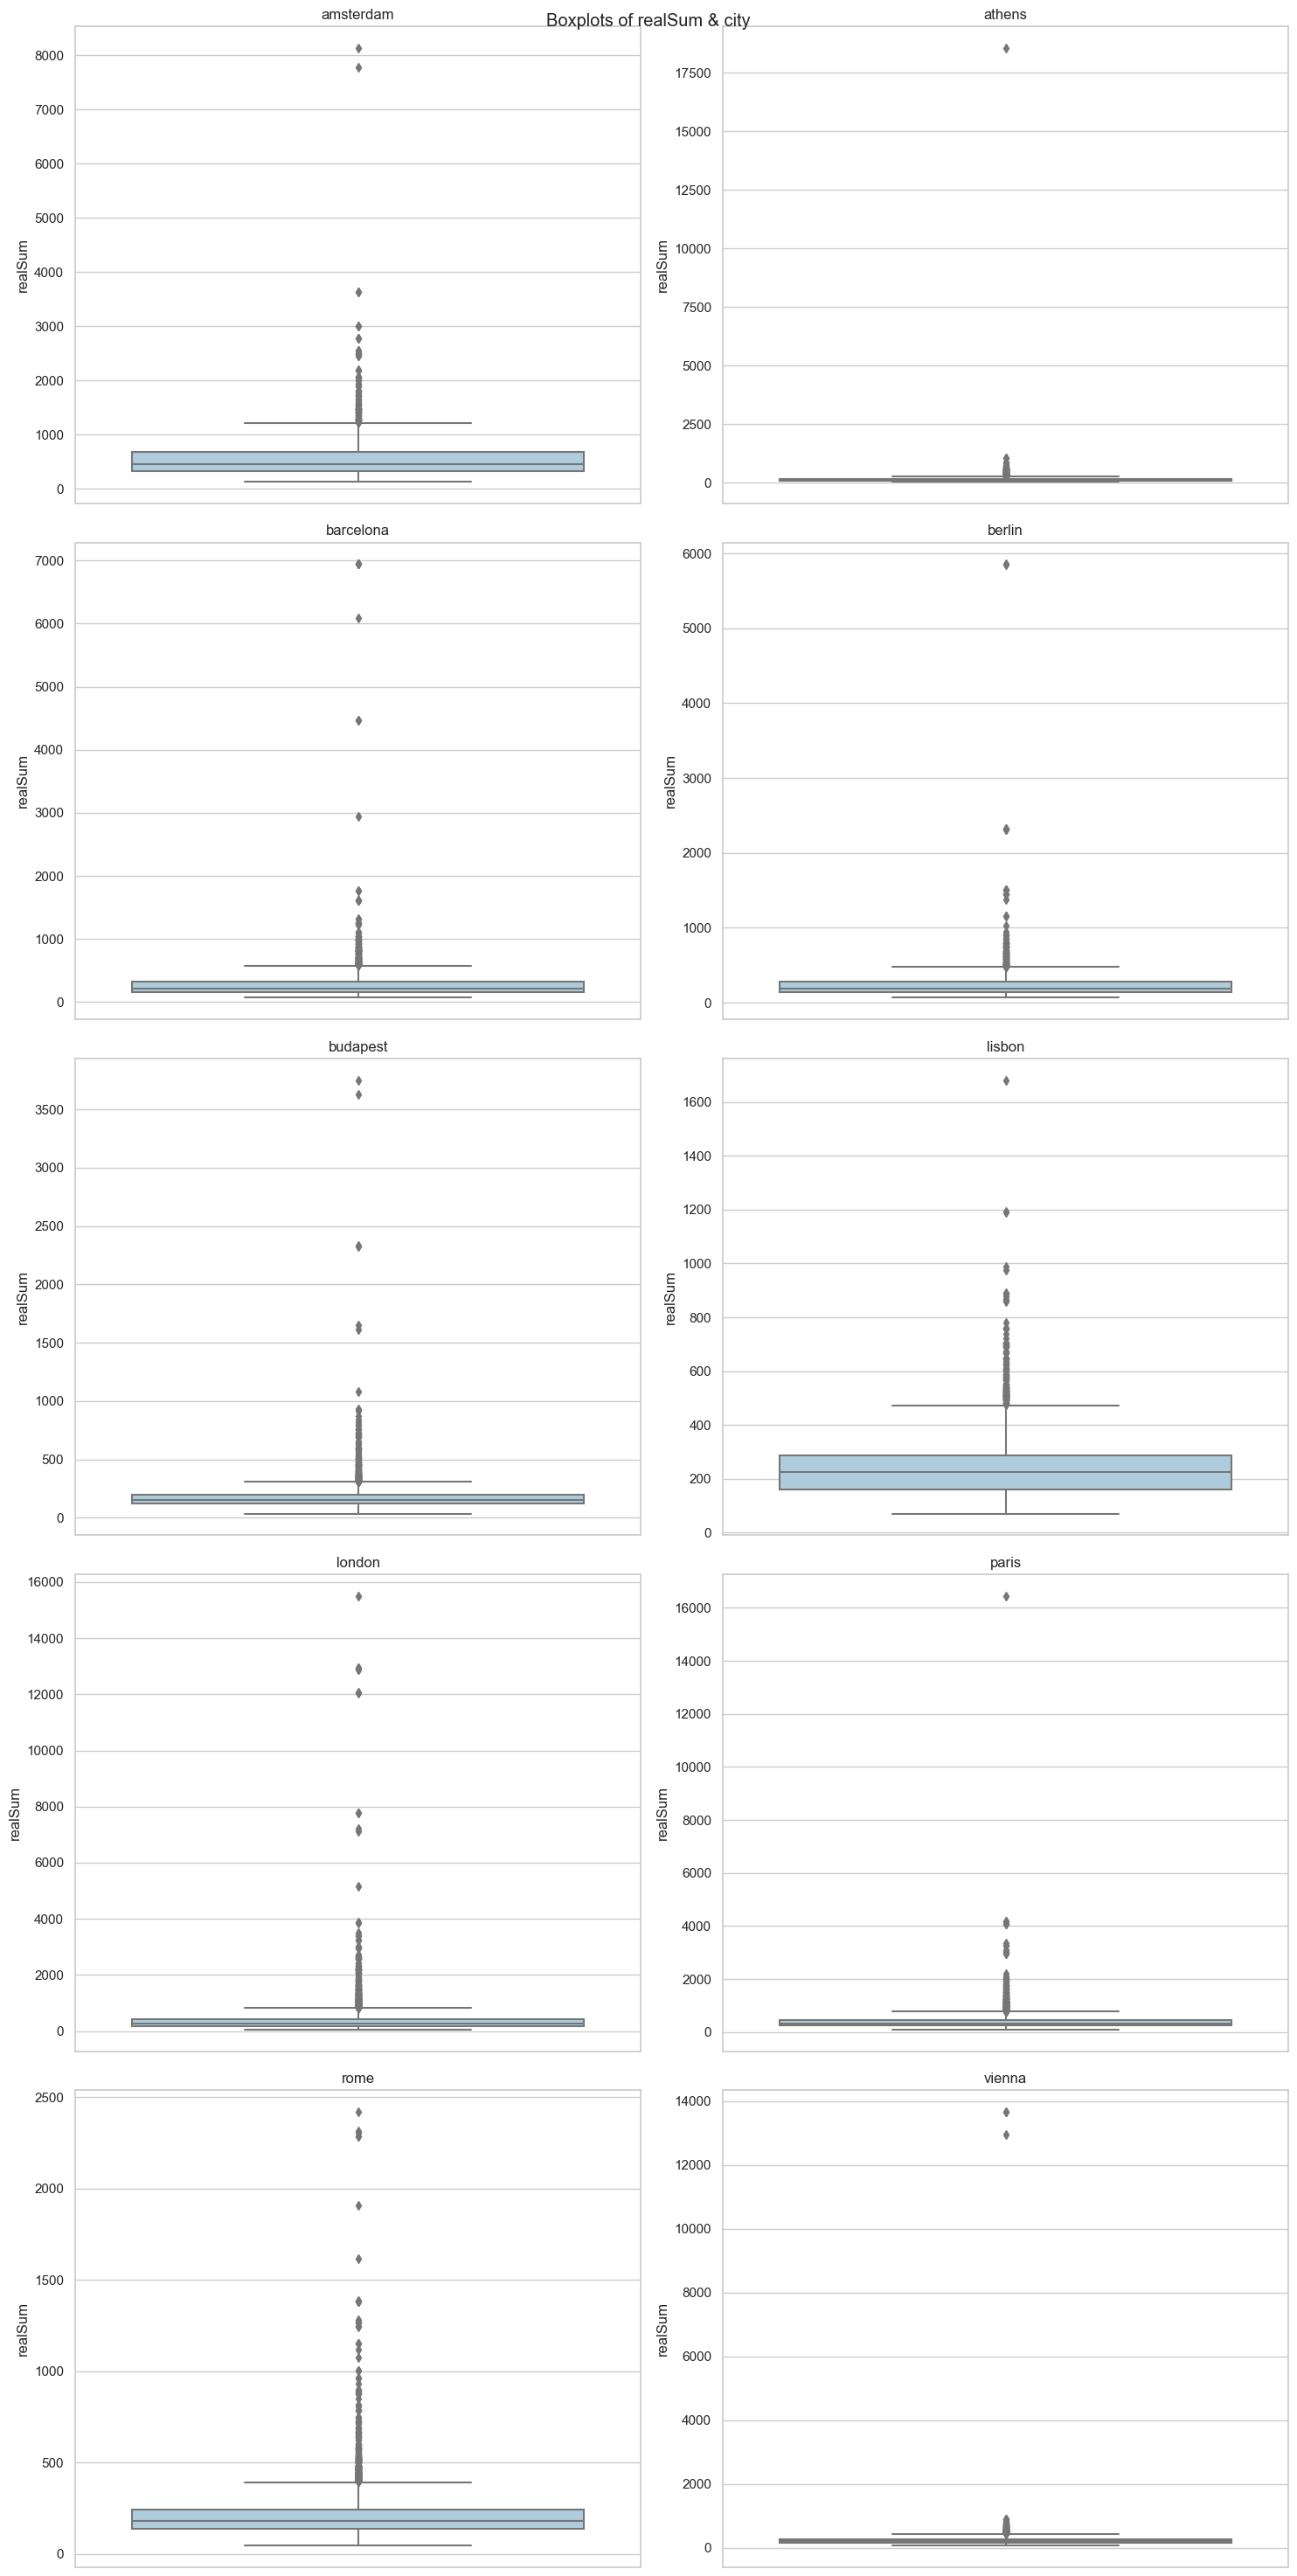

In [12]:
fig, ax = plt.subplots(5,2, sharex=True, figsize=(15,30))
fig.suptitle('Boxplots of realSum & city')

for i, city in enumerate(europe_data['city'].unique()):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=ax[row, col], data=europe_data[europe_data['city'] == city], y='realSum')
    ax[row, col].set_title(city)

plt.tight_layout()
plt.show()

We determined that there are outliers in the realSum. Our decision was that an outlier is a value in realSum that is at least 1000 above the below outlier, by looking at the boxplots above we can determine the following values as non-outliers:

In [13]:
athens_expensive = europe_data.loc[(europe_data['city'] == 'athens') & (europe_data['realSum'] >= 2000)] 
amsterdam_expensive = europe_data.loc[(europe_data['city'] == 'amsterdam') & (europe_data['realSum'] >= 4000)]
barcelona_expensive = europe_data.loc[(europe_data['city'] == 'barcelona') & (europe_data['realSum'] >= 2000)]
berlin_expensive = europe_data.loc[(europe_data['city'] == 'berlin') & (europe_data['realSum'] >= 3000)]
budapest_expensive = europe_data.loc[(europe_data['city'] == 'budapest') & (europe_data['realSum'] >= 2000)]
lisbon_expensive = europe_data.loc[(europe_data['city'] == 'lisbon') & (europe_data['realSum'] >= 1300)]
london_expensive = europe_data.loc[(europe_data['city'] == 'london') & (europe_data['realSum'] >= 5000)]
paris_expensive = europe_data.loc[(europe_data['city'] == 'paris') & (europe_data['realSum'] >= 5000)]
vienna_expensive = europe_data.loc[(europe_data['city'] == 'vienna') & (europe_data['realSum'] >= 2000)]

to_drop = athens_expensive.append([amsterdam_expensive, barcelona_expensive, berlin_expensive, 
                                   budapest_expensive, lisbon_expensive, london_expensive, 
                                   paris_expensive, vienna_expensive])

europe_data = europe_data.drop(to_drop.index)

C:\Users\nikay\AppData\Local\Temp\ipykernel_15952\3778681186.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  to_drop = athens_expensive.append([amsterdam_expensive, barcelona_expensive, berlin_expensive,


With the outliers removed we can look at the influence of the variables on the realSum. We start this off with a comparison of weekdays & weekends.

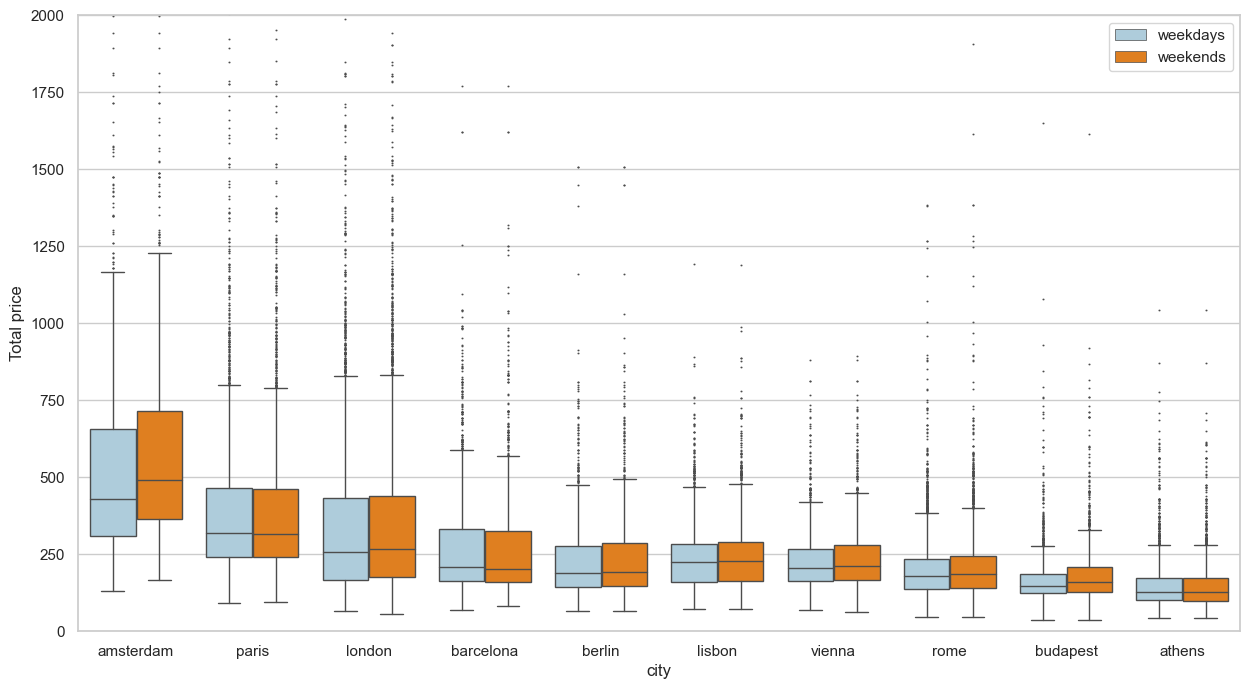

<Figure size 640x480 with 0 Axes>

In [14]:
ranks = europe_data.groupby('city')['realSum'].mean().sort_values()[::-1].index

sns.set_theme(style='whitegrid', palette=paletteC)

plt.figure(figsize=(15, 8))
ax = plt.subplot()
plt.axis([0,8,0,2000])

sns.boxplot(data=europe_data, x="city", y="realSum", hue="week_time", 
            fliersize=0.5, linewidth=1, order=ranks)
plt.ylabel('Total price')
ax.set_xticklabels(ranks)
plt.legend(loc=1)
plt.show()
plt.clf()

*We can see that weekends have a minor effect on realSum in most cities, however it is in almost all cases that the weekends are more expensive*

C:\Users\nikay\AppData\Local\Temp\ipykernel_15952\3967397271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(europe_data.corr(), annot=True)


<Axes: >

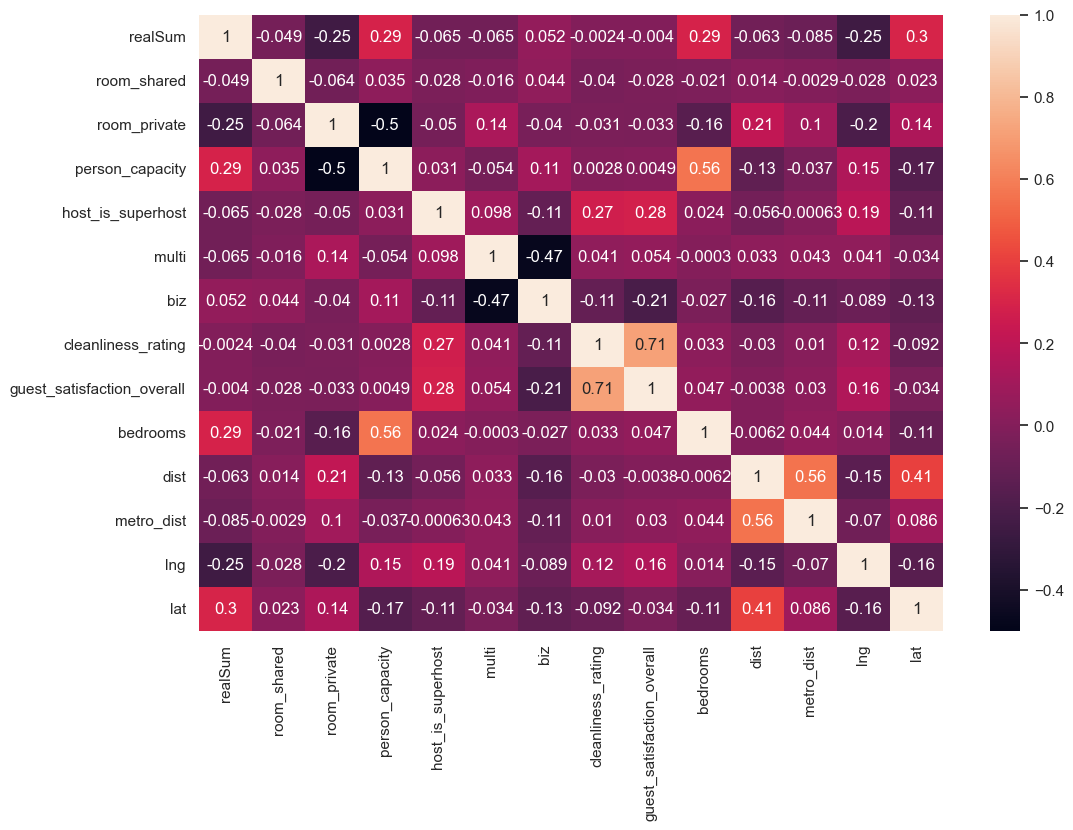

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(europe_data.corr(), annot=True)

From this heatmap we can determine which variables have what amount of impact. It can be seen that Room_type, Week_time, and city are not included, as these are not numerical. 
- Room type will be changed to 0 = Entire home/apt, 1 = Private room, 2 = Shared room
- Weektime will be changed to 0 = weekdays, 1 = weekends
- The column city_number will be generated on the value in 'City'

In [16]:
europe_data['room_type'] = europe_data['room_type'].map({'Entire home/apt' : 0, 'Private room' : 1, 'Shared room' : 2}).astype(int)

europe_data['week_time'] = europe_data['week_time'].map({'weekdays' : 0, 'weekends' : 1}).astype(int)

europe_data['city_number'] = europe_data['city'].map({'amsterdam' : 0, 'athens' : 1, 'barcelona' : 2, 'berlin' : 3,
                                                     'budapest' : 4, 'lisbon' : 5, 'london' : 6, 'paris' : 7, 
                                                     'rome' : 8, 'vienna' : 9}).astype(int)

europe_data.sample(5)

realSum  room_type  room_shared  room_private  person_capacity  \
44239  240.806116          0        False         False              4.0   
16481  226.770691          0        False         False              4.0   
48479  266.460977          0        False         False              3.0   
40244  209.711734          0        False         False              3.0   
44583  115.259626          1        False          True              2.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
44239               True      1    0                10.0   
16481               True      1    0                10.0   
48479              False      0    0                10.0   
40244               True      0    0                10.0   
44583              False      0    1                 9.0   

       guest_satisfaction_overall  bedrooms      dist  metro_dist       lng  \
44239                        98.0         2  0.487829    0.280834  12.50216   
16481                        97.0         1  1.062726    0.387181  19.05463   
48479                        94.0         1  0.473413    0.340358  16.37336   
40244                        95.0         1  3.967150    1.493877  12.46700   
44583                        90.0         1  3.931174    1.591514  12.46400   

            lat  week_time      city  city_number  
44239  41.89648          1      rome            8  
16481  47.48900          1  budapest            4  
48479  48.21278          0    vienna            9  
40244  41.92500          0      rome            8  
44583  41.88000          1      rome            8

C:\Users\nikay\AppData\Local\Temp\ipykernel_15952\3922814063.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(europe_data.corr(), annot=True)


<Axes: >

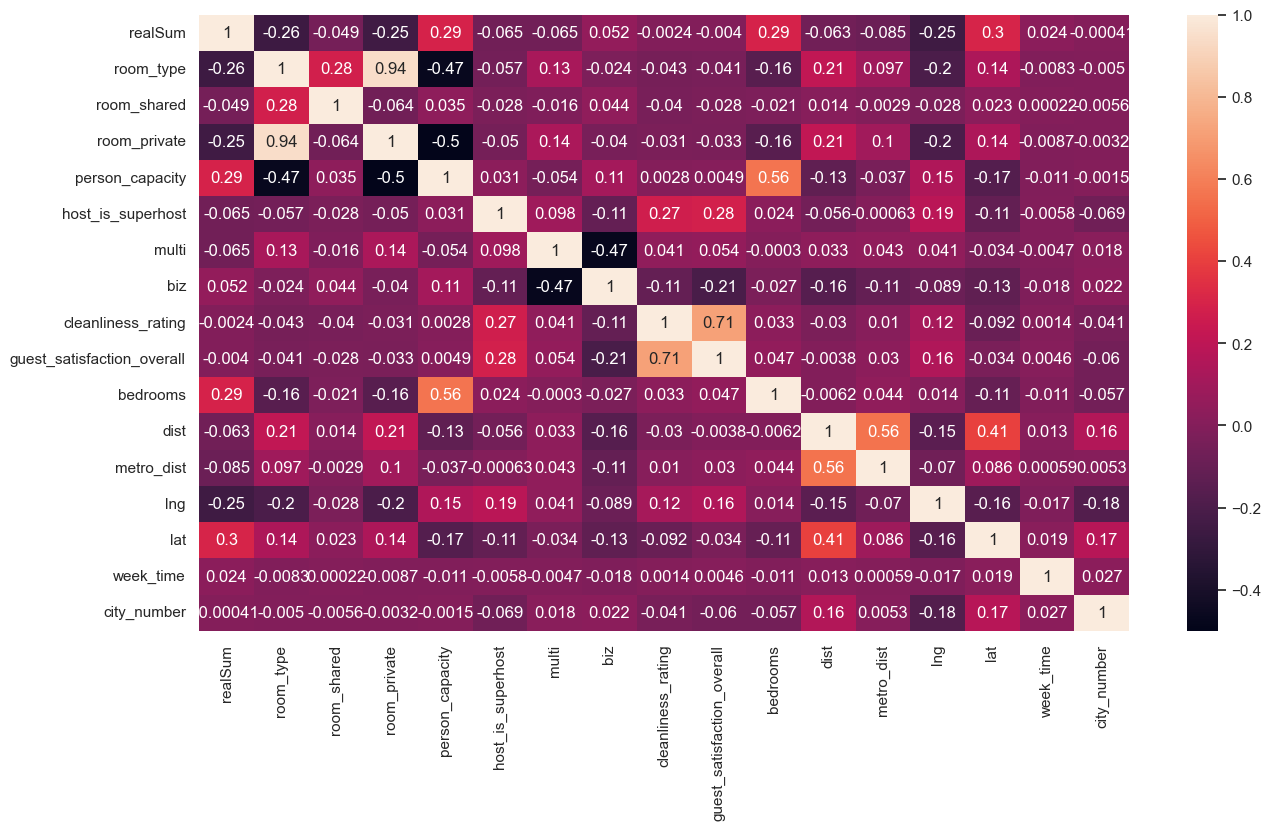

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(europe_data.corr(), annot=True)

### Summary of data inspection
*A summary of all the conclusions drawn from the above visualizations, from major positive influence, to major negative influence*

- Person_capacity, bedrooms, & latitude have the most positive influence on realSum.
- Biz has a minor positive effect on realSum
- Weekends have the least positive effect on realSum.
- Cleaniness & Guest_satisfaction have the least negative influence on realSum.
- Room_shared, host_is_superhost, multi, dist, & metro_dist have around the same minor negative influence on realSum.
- Room_type, Room_private, & longtitude have the same amount on negative influence on realSum.


**(Major) Positive influences on realSum**

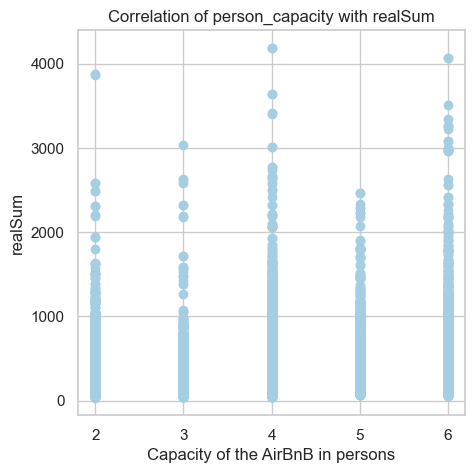

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(europe_data['person_capacity'],europe_data['realSum'])
ax.set_xlabel('Capacity of the AirBnB in persons')
ax.set_ylabel('realSum')
ax.set_title('Correlation of person_capacity with realSum')
plt.show()

*It is as expected that the higher the capacity, the higher the realSum would be. nevertheless did we expect a more clear divide between influence of the capacities.*

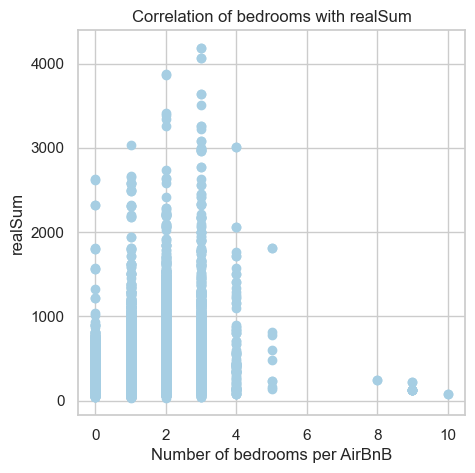

In [19]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(europe_data['bedrooms'],europe_data['realSum'])
ax.set_xlabel('Number of bedrooms per AirBnB')
ax.set_ylabel('realSum')
ax.set_title('Correlation of bedrooms with realSum')
plt.show()

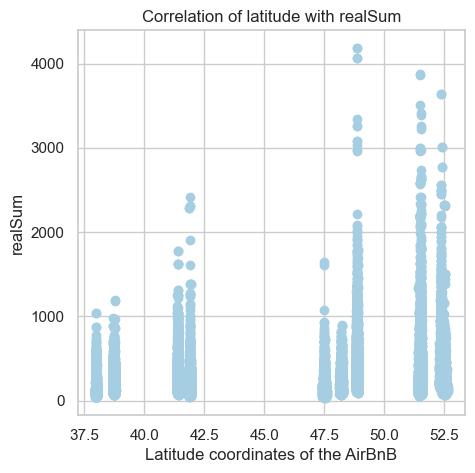

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(europe_data['lat'],europe_data['realSum'])
ax.set_xlabel('Latitude coordinates of the AirBnB')
ax.set_ylabel('realSum')
ax.set_title('Correlation of latitude with realSum')
plt.show()

*The latitude corresponds with the cities and their locations. This can be seen in the scatterplot as lat 51 - 53 have the most high realSum values, which corresponds with London & Amsterdam.*

**(Major) Negative influences on realSum**

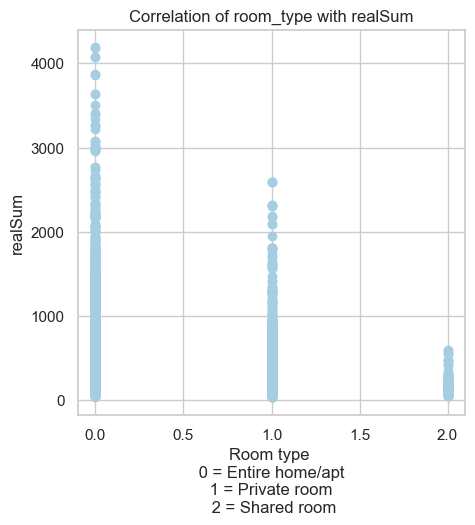

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(europe_data['room_type'],europe_data['realSum'])
ax.set_xlabel('Room type \n 0 = Entire home/apt \n 1 = Private room \n 2 = Shared room')
ax.set_ylabel('realSum')
ax.set_title('Correlation of room_type with realSum')
plt.show()

*It can be seen that the realSum is affected by the room type, as a shared room is often the cheapest and an entire apartment is the most expensive. This is as we expected it to be*

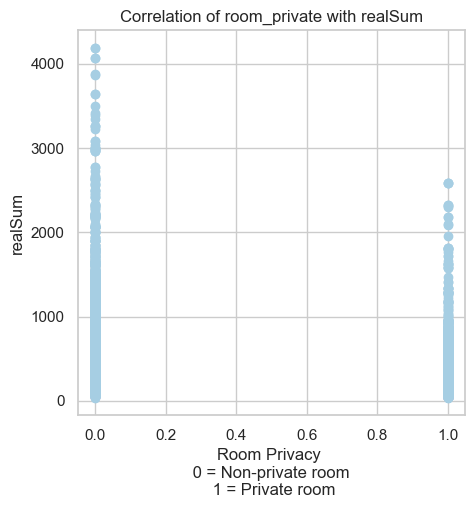

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(europe_data['room_private'],europe_data['realSum'])
ax.set_xlabel('Room Privacy \n 0 = Non-private room \n 1 = Private room')
ax.set_ylabel('realSum')
ax.set_title('Correlation of room_private with realSum')
plt.show()

*The correlation shows that non-private rooms are more likely to be high in realSum. This is against expectations as we expected privatized rooms to be more expensive.*

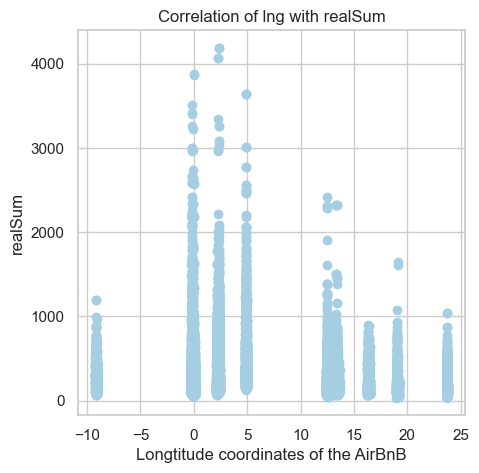

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(europe_data['lng'],europe_data['realSum'])
ax.set_xlabel('Longtitude coordinates of the AirBnB')
ax.set_ylabel('realSum')
ax.set_title('Correlation of lng with realSum')
plt.show()

*As expected the longtitude influences depends on which city has the same coordinates as the longtitude. The 3 highest values are within longtitude 0 - 5, which corresponds with London, Amsterdam, & Paris.*

## Multiple Regression Model

In [24]:
europe_data.sample(5)

realSum  room_type  room_shared  room_private  person_capacity  \
28158  206.260730          1        False          True              2.0   
6116   145.993954          0        False         False              2.0   
30844  297.514053          1        False          True              2.0   
3619   159.820027          0        False         False              5.0   
20453  137.664165          2         True         False              2.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
28158              False      0    0                 9.0   
6116               False      0    1                 8.0   
30844               True      0    1                 9.0   
3619               False      0    0                10.0   
20453              False      0    1                10.0   

       guest_satisfaction_overall  bedrooms      dist  metro_dist       lng  \
28158                        93.0         1  4.056954    1.100058  -0.17148   
6116                         70.0         1  1.170579    0.333619  23.72681   
30844                        84.0         1  2.277293    0.175289  -0.13528   
3619                        100.0         2  2.602961    0.368440  23.75823   
20453                        92.0         1  1.874781    0.241516  -9.15766   

            lat  week_time    city  city_number  
28158  51.48432          1  london            6  
6116   37.96750          1  athens            1  
30844  51.48844          1  london            6  
3619   37.99049          0  athens            1  
20453  38.72164          1  lisbon            5

0.39045941297506404 0.371084643574746


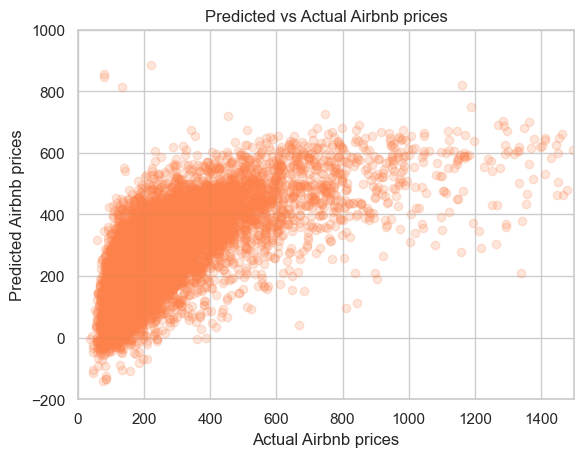

Test apartment = entire apartment, no room shared, private room, 2 person capacity, not a superhost, multiple rooms, not intended for business, cleanliness rating of 9.5, overal guest rating of 9.2, has one bedroom  is 500 meters from city center, 1km from metro, longitude of 5, latitude of 52, listing for weekdays, in Paris
-------------------------------------------------------------------------
Predicted realSum for appartment: €304.43


In [25]:
features = europe_data[['room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 
                        'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'lng', 'lat', 
                        'week_time', 'city_number']]

X = features.values

y = europe_data['realSum']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

MLR = LinearRegression()

model = MLR.fit(X_train, y_train)
y_predict = MLR.predict(X_test)

train_score = MLR.score(X_train, y_train)
test_score = MLR.score(X_test, y_test)
print(train_score, test_score)

plt.scatter(y_test, y_predict, color='#FC814A', alpha=.2)
plt.axis([0,1500,-200,1000])
plt.ylabel('Predicted Airbnb prices')
plt.xlabel('Actual Airbnb prices')
plt.title('Predicted vs Actual Airbnb prices')
plt.show()
plt.close()

airbnb_apartment_ams = [[1, False, True, 2, False, 1, 0, 9.5, 9.2, 1, 1, 0.5, 5, 52, 0, 7]]
predicted_airbnb_apartment_ams = MLR.predict(airbnb_apartment_ams)
print('Test apartment = entire apartment, no room shared, private room, 2 person capacity, not a superhost, multiple rooms, not intended for business, cleanliness rating of 9.5, overal guest rating of 9.2, has one bedroom  is 500 meters from city center, 1km from metro, longitude of 5, latitude of 52, listing for weekdays, in Paris')
print('-------------------------------------------------------------------------')
print("Predicted realSum for appartment: €%.2f" % predicted_airbnb_apartment_ams)

# TESTING - NIET MEENEMEN IN HET EINDVERSLAG

In [26]:
# sns.scatterplot(europe_data, x='guest_satisfaction_overall', y='realSum', hue='city', style='city', palette=paletteC)

In [27]:
# Distance = sns.FacetGrid(europe_data, col="city", col_wrap=3, margin_titles=True)
# Distance = Distance.map(plt.scatter, "guest_satisfaction_overall", "realSum", edgecolor="w").add_legend();
# #sns.scatterplot(europe_data, x='dist', y='realSum', hue='city', style='city', palette=paletteC)

In [28]:
# #Setup code
# listing_counts = europe_data.groupby('city').realSum.count().reset_index()
# superhost_count = europe_data.groupby('city').host_is_superhost.sum().reset_index()
# superhost_count['abbr'] = superhost_count.city.apply(lambda x: x[:3].upper())

# listing_superhost_count = pd.merge(listing_counts, superhost_count).sort_values('realSum', ascending=False)
# listing_superhost_count['perc'] = listing_superhost_count.apply(lambda row:
#                                                                 round((row['host_is_superhost'] / row['realSum'] * 100), 1), axis=1)
# listing_superhost_count['perc'] = listing_superhost_count.perc.apply(lambda x: str(x)+"%")

# #Graph code
# sns.set_theme(style='whitegrid')

# f, ax = plt.subplots(figsize=(6, 5))

# sns.barplot(x='realSum', y='abbr', data=listing_superhost_count, label='total', color='#A6CEE3')

# sns.barplot(x='host_is_superhost', y='abbr', data=listing_superhost_count, label='Superhosts',  color='#FC814A') 

# ax.legend(ncol=2, loc='lower right', frameon=True)
# ax.set(xlim=(0,10000), ylabel='', xlabel='')
# ax.bar_label(ax.containers[1], labels=listing_superhost_count.perc, label_type='edge', padding=5)
# sns.despine(left=True, bottom=True)

# plt.title('Superhost to total Listings per City')
# plt.show()
# plt.clf()

In [29]:
# sns.scatterplot(europe_data, x='dist', y='realSum', hue='city', style='city', palette=paletteC)